First, we process the raw data.

In [29]:
import requests
import time
import csv
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import json
import os
import geopandas as gpd
from shapely.geometry import Point
import json
import unicodedata
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


Data Process Step 1

This code is used to write air quality data from the API, but since the API was a bit problematic, we had to manually save the air quality averages to file hava_kalitesi_ortalamalari.csv in folder data_processed.
We do not recommend running the code below.

In [30]:
#This cell gets the air quality data from api and writes on data_processed/hava_kalitesi_ortalamalari.csv
'''
API_BASE_URL = "https://api.ibb.gov.tr/havakalitesi/OpenDataPortalHandler/"

def get_stations():
    """Gets the list of air quality measurement stations from IMM API."""
    url = API_BASE_URL + "GetAQIStations"
    print(f"The station list is taken from: {url}")
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.Timeout:
        print("The request timed out. Please check your internet connection or try again later.")
        return None
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while fetching stations: {e}")
        return None
    except json.JSONDecodeError:
        print("Station data from API is not in JSON format. Response:")

        print(response.text if 'response' in locals() and hasattr(response, 'text') else "No response or no text content.")
        return None

def display_stations(stations):
    """Shows the station list to the user."""
    if not stations:
        print("No stations found to display.")
        return False
    print("\n Current Air Quality Stations ")
    print("------------------------------------")
    for station in stations:
        station_name = station.get('Name', 'İsim Yok')
        station_id = station.get('Id')
        if station_id: # Sadece ID'si olanları gösterelim
            print(f"ID: {station_id} - İsim: {station_name}")
    print("------------------------------------")

    return True

def get_air_quality_data(station_id, start_date_str, end_date_str):
    """Gets air quality data for a specific station and time period."""
    url = API_BASE_URL + "GetAQIByStationId"

    params = {
        'StationId': station_id,
        'StartDate': start_date_str, # The format expected by the API is: dd.MM.yyyy HH:mm:ss
        'EndDate': end_date_str
    }

    print(f"\nfor station '{station_id}' the data is receiving '{start_date_str}' between '{end_date_str}' ")

    try:
        response = requests.get(url, params=params, timeout=30) # Veri sorgusu için daha uzun timeout
        response.raise_for_status()
        return response.json()
    except requests.exceptions.Timeout:
        print("Data request timed out. Please check your internet connection or try again later.")
        return None
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while fetching air quality data: {e}")
        if response is not None:
            print(f"Sunucu Hatası Detayı: {response.status_code} - {response.text}")
        return None
    except json.JSONDecodeError:
        print("Air quality data from API is not in JSON format. Response:")
        print(response.text if 'response' in locals() and hasattr(response, 'text') else "No response or no text content.")
        return None

def main():
    stations = get_stations()

    if not stations:
        print("Could not receive station data. Terminating program.")
        return

    start_date_str = ["01.01.2024 00:00:00","01.06.2024 00:00:00"]
    end_date_str = ["01.06.2024 00:00:00","01.01.2025 00:00:00"]
    station_data_avg = {}

    for station in stations:

        station_id = station.get("Id")
        station_name = station.get("Name")

        if station_id is None:
            print(f"Warning: Station data is missing an ID, skipping: {station}")
            continue
        if station_name is None:
            print(f"Warning: Station with ID {station_id} has no name, using ID instead.")
            station_name = f"Station_{station_id}"

        aqi_data = []
        for i in range(len(start_date_str)): # Loop by the length of the start_date_str and end_date_str lists
            air_quality_data = get_air_quality_data(station_id, start_date_str[i], end_date_str[i])


            if air_quality_data is not None:
                for air in air_quality_data:
                    if isinstance(air, dict) and "AQI" in air and isinstance(air.get("AQI"), dict):
                        temp = air["AQI"].get("AQIIndex")
                        if temp is not None:
                            try:
                                aqi_data.append(float(temp))
                            except (ValueError, TypeError):
                                print(f"  Warning: Invalid AQI value ({temp}) received for station {station_name}, skipping.")

                    else:
                        print(f"  Warning: Unexpected data structure for station {station_name}: {air}, skipping.")

            else:
                print(f"  Info: No data could be retrieved for {station_name} ({station_id}) between {start_date_str[i]} and {end_date_str[i]}.")


            time.sleep(0.5)

        if aqi_data:
            station_data_avg[station_name] = (sum(aqi_data) / len(aqi_data))
        else:
            station_data_avg[station_name] = None
            print(f"Warning: No AQI data found for the specified periods for station {station_name}.")



    csv_file_name = "data_processed/hava_kalitesi_ortalamalari.csv"
    try:
        with open(csv_file_name, mode='w', newline='', encoding='utf-8-sig') as file:
            writer = csv.writer(file)
            writer.writerow(["İstasyon Adı", "Ortalama AQI"])
            for name, avg_aqi in station_data_avg.items():
                writer.writerow([name, avg_aqi if avg_aqi is not None else "Hesaplanamadı"])
        print(f"\nData successfully saved to '{csv_file_name}'.")
    except IOError:
        print(f"\nAn error occurred while writing to '{csv_file_name}'.")

if __name__ == "__main__":
    main()
'''

'\nAPI_BASE_URL = "https://api.ibb.gov.tr/havakalitesi/OpenDataPortalHandler/"\n\ndef get_stations():\n    """Gets the list of air quality measurement stations from IMM API."""\n    url = API_BASE_URL + "GetAQIStations"\n    print(f"The station list is taken from: {url}")\n    try:\n        response = requests.get(url, timeout=10)\n        response.raise_for_status()\n        return response.json()\n    except requests.exceptions.Timeout:\n        print("The request timed out. Please check your internet connection or try again later.")\n        return None\n    except requests.exceptions.RequestException as e:\n        print(f"An error occurred while fetching stations: {e}")\n        return None\n    except json.JSONDecodeError:\n        print("Station data from API is not in JSON format. Response:")\n\n        print(response.text if \'response\' in locals() and hasattr(response, \'text\') else "No response or no text content.")\n        return None\n\ndef display_stations(stations):\n

In [31]:
#This cell takes the green space of Istanbul as raw data and turns into a readable version

file_path = 'data_raw/green_space.json'

try:
    gdf = gpd.read_file(file_path)
except Exception as e:
    print(f"something bad happened: {e}")
    exit()

neighborhood_column = 'ILCE'


if gdf.crs is None:
    print("\nWarning: The data’s Coordinate Reference System (CRS) is not defined. Assuming EPSG:4326 (WGS84).")
    gdf = gdf.set_crs("EPSG:4326", allow_override=False)  # allow_override=False is safer
elif gdf.crs.to_string() != "EPSG:4326" and not gdf.crs.is_projected:
    print(f"\nWarning: The current CRS of the data is {gdf.crs.to_string()} and it is a geographic system. Converting for area calculation.")


try:
    gdf_projected = gdf.to_crs(epsg=32635) # İstanbul için UTM Zone 35N
except Exception as e:
    print(f"Error during CRS transformation: {e}")
    print("Please make sure your data has a valid geographic CRS.")
    exit()

gdf_projected['alan_metrekare'] = gdf_projected.geometry.area

results = gdf_projected[[neighborhood_column, 'alan_metrekare']]

output_csv_file = 'data_processed/ilce_yesil_alan_yuzolcumu.csv'
results.to_csv(output_csv_file, index=False, encoding='utf-8-sig')

In [32]:
#It takes the coordinates of the districts and the minibus stops in Istanbul as data and matches them and prints them to a CSV.
minibus_json_path = "data_raw/minibus_station.json"
ilce_geojson_path = "data_raw/istanbul-districts.json"

with open(minibus_json_path, "r", encoding="utf-8") as f:
    minibus_data = json.load(f)

minibus_records = []
for feature in minibus_data["features"]:
    props = feature.get("properties", {})
    coords = feature.get("geometry", {}).get("coordinates", [])

    if not coords or len(coords) != 2:
        continue

    minibus_records.append({""  ""
        "DURAK_ADI": props.get("DURAK_ADI", "Bilinmeyen"),
        "geometry": Point(coords)
    })

minibus_gdf = gpd.GeoDataFrame(minibus_records, geometry="geometry", crs="EPSG:4326")

ilce_gdf = gpd.read_file(ilce_geojson_path)

joined = gpd.sjoin(minibus_gdf, ilce_gdf, how="left", predicate="within")

result_df = joined[["DURAK_ADI", "name"]]
result_df.columns = ["Durak Adı", "İlçe"]

os.makedirs("result", exist_ok=True)
result_df.to_csv("data_processed/minibus_duraklari_ilceler.csv", index=False, encoding="utf-8-sig")

In [33]:
#It takes the coordinates of districts and rail system stops in Istanbul as data, matches them and prints them to a CSV file.

istasyon_json_path = "data_raw/station_data.json"
ilce_geojson_path = "data_raw/istanbul-districts.json"

# read the station data
with open(istasyon_json_path, "r", encoding="utf-8") as f:
    istasyon_data = json.load(f)

istasyon_records = []
for feature in istasyon_data["features"]:
    props = feature["properties"]
    coords = feature["geometry"]["coordinates"]
    istasyon_records.append({
        "PROJE_ADI": props["PROJE_ADI"],
        "ISTASYON": props["ISTASYON"],
        "geometry": Point(coords)
    })

istasyon_gdf = gpd.GeoDataFrame(istasyon_records, geometry="geometry", crs="EPSG:4326")

ilce_gdf = gpd.read_file(ilce_geojson_path)

joined = gpd.sjoin(istasyon_gdf, ilce_gdf, how="left", predicate="within")

result_df = joined[["PROJE_ADI", "ISTASYON", "name"]]
result_df.columns = ["Proje Adı", "İstasyon Adı", "İlçe"]

os.makedirs("result", exist_ok=True)
result_df.to_csv("data_processed/istasyon_ilce_eslesmesi.csv", index=False, encoding="utf-8-sig")

In [34]:
#It takes the coordinates of districts and shared-taxi stops in Istanbul as data, matches them and prints them to a CSV file.

taksi_json_path = "data_raw/taxi_station.json"
ilce_geojson_path = "data_raw/istanbul-districts.json"

with open(taksi_json_path, "r", encoding="utf-8") as f:
    taksi_data = json.load(f)

taksi_records = []
for feature in taksi_data["features"]:
    props = feature["properties"]
    coords = feature["geometry"]["coordinates"]
    taksi_records.append({
        "DURAK_ADI": props["DURAK_ADI"],
        "geometry": Point(coords)
    })

taksi_gdf = gpd.GeoDataFrame(taksi_records, geometry="geometry", crs="EPSG:4326")

ilce_gdf = gpd.read_file(ilce_geojson_path)

joined = gpd.sjoin(taksi_gdf, ilce_gdf, how="left", predicate="within")

result_df = joined[["DURAK_ADI", "name"]]
result_df.columns = ["Durak Adı", "İlçe"]

os.makedirs("result", exist_ok=True)
result_df.to_csv("data_processed/taksi_duraklari_ilceler.csv", index=False, encoding="utf-8-sig")

Data Process Step 2

In [35]:
#It takes the processed minibus data and prints a new csvye showing the total amount for each district on a single line.

df = pd.read_csv("data_processed/minibus_duraklari_ilceler.csv")

durak_sayilari = df.groupby("İlçe", as_index=False).size()
durak_sayilari.columns = ["İlçe", "Durak Sayısı"]

os.makedirs("result", exist_ok=True)

durak_sayilari.to_csv("ilce_toplam_minibus.csv", index=False)

In [36]:
#It takes the processed train system data and prints a new csvye showing the total amount for each district on a single line.
df = pd.read_csv("data_processed/istasyon_ilce_eslesmesi.csv")

istasyon_sayilari = df.groupby("İlçe", as_index=False).size()
istasyon_sayilari.columns = ["İlçe", "İstasyon Sayısı"]

os.makedirs("result", exist_ok=True)

istasyon_sayilari.to_csv("ilce_toplam_rayli.csv", index=False)

In [37]:
##It takes the processed shared-taxi data and prints a new csvye showing the total amount for each district on a single line.
df = pd.read_csv("data_processed/taksi_duraklari_ilceler.csv")

durak_sayilari = df.groupby("İlçe", as_index=False).size()
durak_sayilari.columns = ["İlçe", "Taksi Durak Sayısı"]

os.makedirs("result", exist_ok=True)

durak_sayilari.to_csv("ilce_toplam_taksi.csv", index=False)

In [38]:
##It takes the processed green space data and prints a new csvye showing the total amount for each district on a single line.
df = pd.read_csv("data_processed/ilce_yesil_alan_yuzolcumu.csv")

toplamlar = df.groupby("ILCE", as_index=False)["alan_metrekare"].sum()

os.makedirs("result", exist_ok=True)

toplamlar.to_csv("ilce_toplam_alanlar.csv", index=False)

Data Process Step 3: Next, we need to merge them all in one csv file to use.

In [39]:
# normalizing names of districts
def normalize_ilce(ad):
    ad = str(ad).strip().upper()
    ad = ad.replace("İ", "İ")  # Latin I with dot fix
    ad = ad.replace("İ", "I").replace("Ş", "S").replace("Ğ", "G") \
           .replace("Ü", "U").replace("Ö", "O").replace("Ç", "C")
    ad = ''.join(c for c in unicodedata.normalize('NFD', ad) if unicodedata.category(c) != 'Mn')
    return ad

# read the population data
raw_lines = []
with open("data_raw/ilce_bazinda_nufus.csv", "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("|")
        if len(parts) >= 3 and "İstanbul" in parts[1]:
            try:
                ilce_parca = parts[1].split("(")[1].split("/")[0]
                nufus = float(parts[2]) if parts[2] else 0.0
                raw_lines.append((ilce_parca, nufus))
            except:
                continue

nufus_df = pd.DataFrame(raw_lines, columns=["ILCE_RAW", "Nufus"])
nufus_df["ILCE"] = nufus_df["ILCE_RAW"].apply(normalize_ilce)

alan_df = pd.read_csv("data_processed/ilce_toplam_alanlar.csv")
alan_df["ILCE_RAW"] = alan_df["ILCE"]
alan_df["ILCE"] = alan_df["ILCE"].apply(normalize_ilce)

# Minibus
minibus_df = pd.read_csv("data_processed/ilce_toplam_minibus.csv")
minibus_df.columns = ["ILCE_RAW", "Minibus_Durak_Sayisi"]
minibus_df["ILCE"] = minibus_df["ILCE_RAW"].apply(normalize_ilce)

# trains
rayli_df = pd.read_csv("data_processed/ilce_toplam_rayli.csv")
rayli_df.columns = ["ILCE_RAW", "Rayli_Istasyon_Sayisi"]
rayli_df["ILCE"] = rayli_df["ILCE_RAW"].apply(normalize_ilce)

# taxi
taksi_df = pd.read_csv("data_processed/ilce_toplam_taksi.csv")
taksi_df.columns = ["ILCE_RAW", "Taksi_Durak_Sayisi"]
taksi_df["ILCE"] = taksi_df["ILCE_RAW"].apply(normalize_ilce)

#aq
aqi_df = pd.read_csv("data_processed/hava_kalitesi_ortalamalari.csv")  # dosya adı aqi_verisi.csv olsun
aqi_df.columns = ["ILCE_RAW", "Ortalama_AQI"]
aqi_df["ILCE"] = aqi_df["ILCE_RAW"].apply(normalize_ilce)

# Merge
merged = alan_df.merge(minibus_df[["ILCE", "Minibus_Durak_Sayisi"]], on="ILCE", how="left")
merged = merged.merge(rayli_df[["ILCE", "Rayli_Istasyon_Sayisi"]], on="ILCE", how="left")
merged = merged.merge(taksi_df[["ILCE", "Taksi_Durak_Sayisi"]], on="ILCE", how="left")
merged = merged.merge(nufus_df[["ILCE", "Nufus"]], on="ILCE", how="left")
merged = merged.merge(aqi_df[["ILCE", "Ortalama_AQI"]], on="ILCE", how="left")
merged.fillna(0, inplace=True)

merged[["Minibus_Durak_Sayisi", "Rayli_Istasyon_Sayisi", "Taksi_Durak_Sayisi"]] = \
    merged[["Minibus_Durak_Sayisi", "Rayli_Istasyon_Sayisi", "Taksi_Durak_Sayisi"]].astype(int)

merged.drop(columns=["ILCE"], inplace=True)
merged.rename(columns={"ILCE_RAW": "ILCE"}, inplace=True)
merged = merged[["ILCE", "alan_metrekare", "Nufus", "Minibus_Durak_Sayisi",
                 "Rayli_Istasyon_Sayisi", "Taksi_Durak_Sayisi", "Ortalama_AQI"]]

merged.to_csv("data_processed/birlesik_ilce_verisi.csv", index=False)

An overview of the dataset:

In [40]:
df_districts_data = pd.read_csv("data_processed/birlesik_ilce_verisi.csv")
print("First five rows (birlesik_ilce_verisi.csv):")
display(df_districts_data.head())
print("\nStatistical summary:")
display(df_districts_data.describe().transpose())

First five rows (birlesik_ilce_verisi.csv):


,ILCE,alan_metrekare,Nufus,Minibus_Durak_Sayisi,Rayli_Istasyon_Sayisi,Taksi_Durak_Sayisi,Ortalama_AQI
0,ADALAR,51158.829550,16979.0,0,0,0,21.872800
1,ARNAVUTKÖY,64545.192126,344868.0,204,5,2,29.735716
2,ATAŞEHİR,652554.349856,414866.0,293,8,29,29.787501
3,AVCILAR,758438.617676,440934.0,153,2,12,29.202595
4,BAHÇELİEVLER,172658.041124,560086.0,240,9,14,36.609391



Statistical summary:


,count,mean,std,min,25%,50%,75%,max
alan_metrekare,39.0,1.404675e+06,1.356832e+06,29380.789242,552648.424089,860383.266437,1.916942e+06,7.189931e+06
Nufus,39.0,4.026052e+05,2.050897e+05,16979.000000,266567.000000,414866.000000,5.075290e+05,9.883690e+05
Minibus_Durak_Sayisi,39.0,2.032051e+02,9.857142e+01,0.000000,143.500000,204.000000,2.750000e+02,3.960000e+02
Rayli_Istasyon_Sayisi,39.0,8.641026e+00,7.747622e+00,0.000000,2.500000,8.000000,1.050000e+01,2.700000e+01
Taksi_Durak_Sayisi,39.0,1.571795e+01,1.391128e+01,0.000000,7.000000,12.000000,1.950000e+01,6.200000e+01
Ortalama_AQI,39.0,3.588137e+01,8.208693e+00,21.872800,29.735716,36.609391,3.946438e+01,6.546189e+01


Now , we can start PSO and GA algorithms.

In [41]:
#limitations of green spaces
TOTAL_LIMIT = 3_000_000
PER_TOWN_LIMIT = 1_000_000

POP_SIZE = 100  # GA Population size
GENS = 200  # GA Generations
MUT_PROB = 0.2
ELITISM = 0.1

PSO_POP_SIZE = 30  # PSO Population size (number of particles)
PSO_ITERATIONS = 100  # PSO Iterations (k_max)


def init_population(bounds):
    return [repair_individual(np.array([random.uniform(lb, ub) for lb, ub in bounds]), bounds) for _ in range(POP_SIZE)]


def mutate(individual, bounds):
    mutant = np.array([
        min(ub, max(lb, gene + np.random.normal(0, (ub - lb) * 0.1)))  # Mutation scaled by bound range
        for gene, (lb, ub) in zip(individual, bounds)
    ])
    return repair_individual(mutant, bounds)


def crossover(p1, p2):
    alpha = np.random.rand(len(p1))
    child = alpha * p1 + (1 - alpha) * p2
    return child


def select(population, fitnesses):
    num_elites = max(1, int(ELITISM * POP_SIZE)) if POP_SIZE > 0 and ELITISM > 0 else 0
    if not population:
        return []

    # Handle non-finite fitness values before sorting
    finite_fitness_indices = [i for i, f in enumerate(fitnesses) if np.isfinite(f)]
    if not finite_fitness_indices:  # All fitnesses are non-finite
        # Fallback: if no finite fitnesses, select randomly or return empty
        # This case should ideally be prevented by robust objective/repair functions
        return [random.choice(population) for _ in range(num_elites)] if population and num_elites > 0 else []

    # Sort based on finite fitnesses, placing non-finite ones effectively at the end (worst)
    # Create a list of (fitness, original_index) tuples for sorting
    sortable_fitnesses = []
    for i, f in enumerate(fitnesses):
        if np.isfinite(f):
            sortable_fitnesses.append((f, i))
        else:
            sortable_fitnesses.append((float('inf'), i))  # Treat non-finite as worst

    sorted_indices = [i for f, i in sorted(sortable_fitnesses, key=lambda x: x[0])]
    return [population[i] for i in sorted_indices[:num_elites]]


def repair_individual(x, bounds):
    x = np.array([np.clip(val, bounds[i][0], bounds[i][1]) for i, val in enumerate(x)])
    total = np.sum(x)
    if total > TOTAL_LIMIT:
        # Avoid division by zero if total is zero (though unlikely if TOTAL_LIMIT > 0)
        if total > 1e-9:
            x = x * (TOTAL_LIMIT / total)
        else:  # If total is near zero and exceeds TOTAL_LIMIT (impossible if TOTAL_LIMIT > 0)
            x = np.zeros_like(x)  # Or handle as an error/special case

    x = np.array([np.clip(val, bounds[i][0], bounds[i][1]) for i, val in enumerate(x)])
    if np.sum(x) > TOTAL_LIMIT:
        current_sum = np.sum(x)
        if current_sum > 1e-9:  # Avoid division by zero
            x = x * (TOTAL_LIMIT / current_sum)
        else:
            x = np.zeros_like(x)
    return x


def run_ga(bounds, objective_func_ga):  # Renamed to avoid conflict
    population = init_population(bounds)
    history = []

    for gen in range(GENS):
        fitnesses = [objective_func_ga(ind) for ind in population]

        if not fitnesses:
            best_fitness_this_gen = float('inf')
        else:
            valid_fitnesses = [f for f in fitnesses if np.isfinite(f)]
            if not valid_fitnesses:
                best_fitness_this_gen = float('inf')
            else:
                best_fitness_this_gen = min(valid_fitnesses)

        history.append(best_fitness_this_gen)
        selected_elites = select(population, fitnesses)

        if not selected_elites and POP_SIZE > 0:
            if population and any(np.isfinite(f) for f in fitnesses):  # Check if any finite fitness exists
                # Get indices of finite fitnesses
                finite_indices = [i for i, f_val in enumerate(fitnesses) if np.isfinite(f_val)]
                # Get the index of the minimum finite fitness
                min_finite_idx = finite_indices[np.argmin([fitnesses[i] for i in finite_indices])]
                selected_elites = [population[min_finite_idx]]
            else:
                selected_elites = [init_population(bounds)[0] for _ in range(max(1, int(ELITISM * POP_SIZE)))]

        new_pop = list(selected_elites)

        while len(new_pop) < POP_SIZE:
            if len(selected_elites) >= 2:
                parents = random.sample(selected_elites, 2)
            elif selected_elites:
                parents = [selected_elites[0], random.choice(population)]
            else:
                parents = random.sample(population, 2) if len(population) >= 2 else [init_population(bounds)[0]] * 2

            child1 = crossover(parents[0], parents[1])

            if random.random() < MUT_PROB:
                child1 = mutate(child1, bounds)

            child1 = repair_individual(child1, bounds)
            new_pop.append(child1)
        population = new_pop

    final_fitnesses = [objective_func_ga(ind) for ind in population]

    best_idx = -1
    current_best_fitness = float('inf')
    for i, f in enumerate(final_fitnesses):
        if np.isfinite(f) and f < current_best_fitness:
            current_best_fitness = f
            best_idx = i

    if best_idx != -1:
        best_individual = population[best_idx]
    else:
        print("Warning: No valid best individual found by GA. Returning first valid or re-initialized individual.")
        # Try to find any individual with finite fitness
        valid_indices = [i for i, f_val in enumerate(final_fitnesses) if np.isfinite(f_val)]
        if valid_indices:
            best_individual = population[valid_indices[0]]  # Pick the first one found
        else:  # Absolute fallback
            best_individual = init_population(bounds)[0]

    best_score_val = objective_func_ga(best_individual)

    return best_individual, best_score_val, history


class Particle:
    def __init__(self, x, v, bounds, repair_func, objective_func_pso):  # Renamed
        self.x = np.array(x)
        self.v = np.array(v)
        self.bounds = bounds
        self.repair_func = repair_func
        self.objective_func_pso = objective_func_pso  # Renamed

        self.x = self.repair_func(self.x, self.bounds)
        self.pbest_x = self.x.copy()
        self.pbest_score = self.objective_func_pso(self.pbest_x)  # Use renamed

    def update_velocity(self, gbest_x, w, c1, c2, n_dim):
        r1, r2 = np.random.rand(n_dim), np.random.rand(n_dim)
        self.v = w * self.v + \
                 c1 * r1 * (self.pbest_x - self.x) + \
                 c2 * r2 * (gbest_x - self.x)
        max_vel_ratio = 0.2
        for i in range(n_dim):
            max_v = (self.bounds[i][1] - self.bounds[i][0]) * max_vel_ratio
            self.v[i] = np.clip(self.v[i], -max_v, max_v)

    def update_position(self):
        self.x += self.v
        self.x = self.repair_func(self.x, self.bounds)
        current_score = self.objective_func_pso(self.x)  # Use renamed
        if np.isfinite(current_score) and current_score < self.pbest_score:
            self.pbest_x = self.x.copy()
            self.pbest_score = current_score


def particle_swarm_optimization(objective_func_pso, population_particles, k_max, w=0.7, c1=1.5, c2=1.5):  # Renamed
    if not population_particles:
        return None, float('inf'), []

    gbest_x = None
    gbest_score = float('inf')

    # Initialize global best from particles, ensuring finite scores are preferred
    for particle in population_particles:
        if np.isfinite(particle.pbest_score) and particle.pbest_score < gbest_score:
            gbest_score = particle.pbest_score
            gbest_x = particle.pbest_x.copy()

    # If no particle had a finite pbest_score initially, gbest_x might still be None
    if gbest_x is None and population_particles:
        # Fallback: pick the first particle's pbest if available, or initialize
        if population_particles[0].pbest_x is not None:
            gbest_x = population_particles[0].pbest_x.copy()
            gbest_score = population_particles[0].pbest_score  # Might be inf
        else:  # Should not happen if particle init is correct
            return None, float('inf'), []

    if gbest_x is None:  # Still no gbest_x means population_particles was empty or problematic
        return None, float('inf'), []

    n_dim = len(gbest_x)
    history = []

    for k in range(k_max):
        for particle in population_particles:
            particle.update_velocity(gbest_x, w, c1, c2, n_dim)
            particle.update_position()  # This updates particle.pbest_score

            if np.isfinite(particle.pbest_score) and particle.pbest_score < gbest_score:
                gbest_score = particle.pbest_score
                gbest_x = particle.pbest_x.copy()
        history.append(gbest_score)

    return gbest_x, gbest_score, history


def create_pso_population(num_particles, bounds, repair_func, objective_func_pso, seed):  # Renamed
    # np.random.seed(seed) # Seeding here might make all initial particles too similar if objective_func is deterministic
    # random.seed(seed) # Better to seed once globally if needed
    population = []
    n_dim = len(bounds)
    for _ in range(num_particles):
        x = np.array([random.uniform(lb, ub) for lb, ub in bounds])
        v = np.array([random.uniform(-(bounds[i][1] - bounds[i][0]) * 0.1, (bounds[i][1] - bounds[i][0]) * 0.1) for i in
                      range(n_dim)])

        # Ensure objective_func_pso is callable for particle initialization
        particle = Particle(x, v, bounds, repair_func, objective_func_pso)
        population.append(particle)
    return population


def main():
    # Define W1 and W2 scenarios
    weight_scenarios = [
        {"W1": 1.0, "W2": 0.0, "label": "W1_1.0_W2_0.0"},
        {"W1": 0.9, "W2": 0.1, "label": "W1_0.9_W2_0.1"},
        {"W1": 0.8, "W2": 0.2, "label": "W1_0.8_W2_0.2"},
        {"W1": 0.7, "W2": 0.3, "label": "W1_0.7_W2_0.3"},
        {"W1": 0.6, "W2": 0.4, "label": "W1_0.6_W2_0.4"},
        {"W1": 0.5, "W2": 0.5, "label": "W1_0.5_W2_0.5"},
        {"W1": 0.4, "W2": 0.5, "label": "W1_0.4_W2_0.6"},
        {"W1": 0.3, "W2": 0.7, "label": "W1_0.3_W2_0.7"},
        {"W1": 0.2, "W2": 0.8, "label": "W1_0.2_W2_0.8"},
        {"W1": 0.1, "W2": 0.9, "label": "W1_0.1_W2_0.9"},
        {"W1": 0.0, "W2": 1.0, "label": "W1_0.0_W2_1.0"}
    ]

    df_base = pd.read_csv("data_processed/birlesik_ilce_verisi.csv")
    df_results = df_base.copy()

    # Transportation score (calculated once)
    df_base["Ti_raw"] = df_base["Minibus_Durak_Sayisi"] + df_base["Taksi_Durak_Sayisi"] + 2 * df_base[
        "Rayli_Istasyon_Sayisi"]

    # Normalizations (independent of W1, W2 - calculated once)
    GA_real = df_base["alan_metrekare"].values.astype(float)
    GA_min, GA_max = GA_real.min(), GA_real.max()
    GA_norm = (GA_real - GA_min) / (GA_max - GA_min + 1e-9)

    P_real = df_base["Nufus"].values.astype(float)
    P_min, P_max = P_real.min(), P_real.max()
    P_norm = (P_real - P_min) / (P_max - P_min + 1e-9)

    Ti_real = df_base["Ti_raw"].values.astype(float)
    Ti_min, Ti_max = Ti_real.min(), Ti_real.max()
    Ti_norm = (Ti_real - Ti_min) / (Ti_max - Ti_min + 1e-9)

    AQI_real = df_base["Ortalama_AQI"].values.astype(float)
    AQI_min, AQI_max = AQI_real.min(), AQI_real.max()
    AQI_norm = (AQI_real - AQI_min) / (AQI_max - AQI_min + 1e-9)

    # Bounds (calculated once)
    lower_bounds = np.zeros(len(GA_real))
    upper_bounds = np.minimum(GA_real / 2, PER_TOWN_LIMIT)
    for i in range(len(upper_bounds)):
        if lower_bounds[i] > upper_bounds[i]:
            upper_bounds[i] = lower_bounds[i]
    bounds = list(zip(lower_bounds, upper_bounds))

    # Dictionary to hold parameters for the objective function that change per scenario
    objective_params = {'S_norm_current': None}

    # Define objective function (it will use S_norm_current from objective_params)
    def objective(x_new_green_area_real):
        x_new_green_area_real = np.array(x_new_green_area_real)
        x_norm = x_new_green_area_real / (GA_max + 1e-9)
        total_norm_green_area = GA_norm + x_norm

        current_S_norm = objective_params['S_norm_current']

        performance_term = (current_S_norm * P_norm) / (total_norm_green_area + 1e-6)
        base = np.sum(performance_term)

        current_total_green_area_real = GA_real + x_new_green_area_real
        green_per_person_real = current_total_green_area_real / (P_real + 1e-9)

        initial_green_per_person_real = GA_real / (P_real + 1e-9)
        if np.max(initial_green_per_person_real) > 1e-9:
            norm_initial_gpp = initial_green_per_person_real / np.max(initial_green_per_person_real)
        else:
            norm_initial_gpp = np.zeros_like(initial_green_per_person_real)

        # Penalty for districts with less than 1 m² per person
        gpp_deficit = np.maximum(1.0 - green_per_person_real, 0)
        penalty_min_gpp = np.sum(gpp_deficit)

        fairness_penalty = np.sum(x_new_green_area_real * norm_initial_gpp)

        # coefficients
        penalty_coefficient = 0.000005
        min_gpp_penalty_coeff = 0.0001

        return base + penalty_coefficient * fairness_penalty + min_gpp_penalty_coeff * penalty_min_gpp

    #for best scores
    score_rows = []

    # Loop through scenarios
    for scenario in weight_scenarios:
        W1_scen = scenario["W1"]
        W2_scen = scenario["W2"]
        label = scenario["label"]

        print(f"\n--- Running Scenario: {label} (W1={W1_scen}, W2={W2_scen}) ---")

        # Calculate S_norm for the current scenario and update objective_params
        objective_params['S_norm_current'] = W1_scen * AQI_norm + W2_scen * Ti_norm

        print("🧬 Running Genetic Algorithm...")
        # Pass the 'objective' function which now uses the updated 'S_norm_current'
        best_solution_ga, best_score_ga, history_ga = run_ga(bounds, objective)

        print("\n⚙️ Running Particle Swarm Optimization...")
        # Seed for PSO population creation to ensure some consistency if desired for PSO part
        # Note: Seeding inside create_pso_population might be better if full reproducibility per call is needed
        # For now, using a fixed seed for each scenario's PSO population creation
        pso_particles = create_pso_population(PSO_POP_SIZE, bounds, repair_individual, objective, seed=42)
        best_solution_pso, best_score_pso, history_pso = particle_swarm_optimization(
            objective_func_pso=objective,  # PSO also uses the same objective
            population_particles=pso_particles,
            k_max=PSO_ITERATIONS
        )

        # Store results with scenario-specific column names
        ga_col_yeni = f"Yeni_Yapilacak_Yesil_Alan_GA_{label}"
        ga_col_toplam = f"Toplam_Yesil_Alan_GA_{label}"
        pso_col_yeni = f"Yeni_Yapilacak_Yesil_Alan_PSO_{label}"
        pso_col_toplam = f"Toplam_Yesil_Alan_PSO_{label}"

        df_results[ga_col_yeni] = best_solution_ga
        df_results[ga_col_toplam] = df_results["alan_metrekare"] + best_solution_ga

        if best_solution_pso is not None:
            df_results[pso_col_yeni] = best_solution_pso
            df_results[pso_col_toplam] = df_results["alan_metrekare"] + best_solution_pso
        else:
            df_results[pso_col_yeni] = 0  # Or np.nan
            df_results[pso_col_toplam] = df_results["alan_metrekare"]

        print(f"\n--- Results for Scenario: {label} ---")
        print(f"Best GA Score: {best_score_ga:.4f}")
        print(f"Total newly built green area (GA): {np.sum(best_solution_ga):,.2f} m²")

        if best_solution_pso is not None:
            print(f"Best PSO Score: {best_score_pso:.4f}")
            print(f"Total newly built green area (PSO): {np.sum(best_solution_pso):,.2f} m²")
        else:
            print("⚠️ PSO did not return a valid solution for this scenario.")

        # save the scores
        score_rows.append({
            "Scenario_Label": label,
            "W1": W1_scen,
            "W2": W2_scen,
            "Best_Score_GA": best_score_ga,
            "Best_Score_PSO": best_score_pso if best_solution_pso is not None else None
        })

    # Save the consolidated DataFrame
    output_filename = "outputs/new_optimum_yesil_alan_sonuclari_SCENARIOS.csv"
    df_results.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"\n📁 All scenario results saved to file '{output_filename}'.")

    # write the best scores in csv file
    df_scores = pd.DataFrame(score_rows)
    df_scores.to_csv("outputs/optimization_best_scores.csv", index=False, encoding="utf-8-sig")
    print("📁 Best scores saved to 'outputs/optimization_best_scores.csv' file.")

if __name__ == "__main__":
    # Create a dummy CSV for testing if it doesn't exist
    dummy_csv_path = "data_processed/birlesik_ilce_verisi.csv"
    try:
        pd.read_csv(dummy_csv_path)
    except FileNotFoundError:
        print(f"Dummy '{dummy_csv_path}' not found. Creating one for testing.")
        if not os.path.exists("result"):
            os.makedirs("result")
        dummy_data = {
            "ILCE": [f"Ilce_{i}" for i in range(10)],
            "Minibus_Durak_Sayisi": np.random.randint(5, 50, 10),
            "Taksi_Durak_Sayisi": np.random.randint(2, 20, 10),
            "Rayli_Istasyon_Sayisi": np.random.randint(0, 5, 10),
            "alan_metrekare": np.random.randint(100000, 2000000, 10).astype(float),
            "Nufus": np.random.randint(50000, 500000, 10).astype(float),
            "Ortalama_AQI": np.random.uniform(20, 80, 10)
        }
        dummy_df = pd.DataFrame(dummy_data)
        dummy_df.to_csv(dummy_csv_path, index=False)
        print("Dummy CSV created.")

    random.seed(42)
    np.random.seed(42)
    main()


--- Running Scenario: W1_1.0_W2_0.0 (W1=1.0, W2=0.0) ---
🧬 Running Genetic Algorithm...

⚙️ Running Particle Swarm Optimization...

--- Results for Scenario: W1_1.0_W2_0.0 ---
Best GA Score: 89.1452
Total newly built green area (GA): 2,804,580.33 m²
Best PSO Score: 89.5408
Total newly built green area (PSO): 2,718,553.35 m²

--- Running Scenario: W1_0.9_W2_0.1 (W1=0.9, W2=0.1) ---
🧬 Running Genetic Algorithm...

⚙️ Running Particle Swarm Optimization...

--- Results for Scenario: W1_0.9_W2_0.1 ---
Best GA Score: 92.3806
Total newly built green area (GA): 2,987,623.45 m²
Best PSO Score: 100.0800
Total newly built green area (PSO): 2,939,502.88 m²

--- Running Scenario: W1_0.8_W2_0.2 (W1=0.8, W2=0.2) ---
🧬 Running Genetic Algorithm...

⚙️ Running Particle Swarm Optimization...

--- Results for Scenario: W1_0.8_W2_0.2 ---
Best GA Score: 96.7593
Total newly built green area (GA): 2,922,880.84 m²
Best PSO Score: 100.3632
Total newly built green area (PSO): 2,818,956.22 m²

--- Running Scen

A version of the code in the cell above that only applies the w1=0.5 w2= 0.5 scenario and saves the converge behavior as png.


--- Running Scenario: W1_0.5_W2_0.5 (W1=0.5, W2=0.5) ---
🧬 Running Genetic Algorithm...


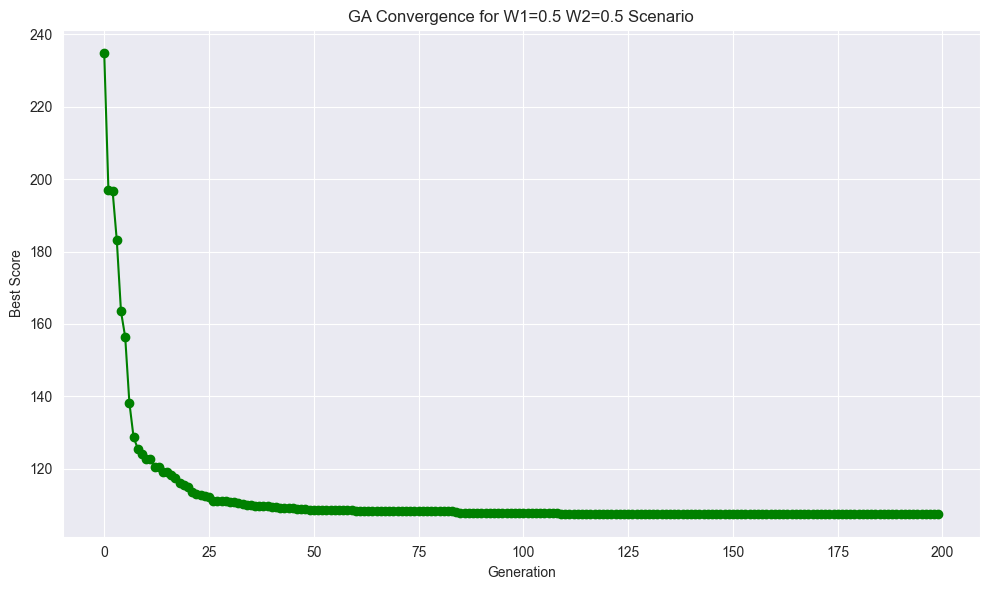


⚙️ Running Particle Swarm Optimization...


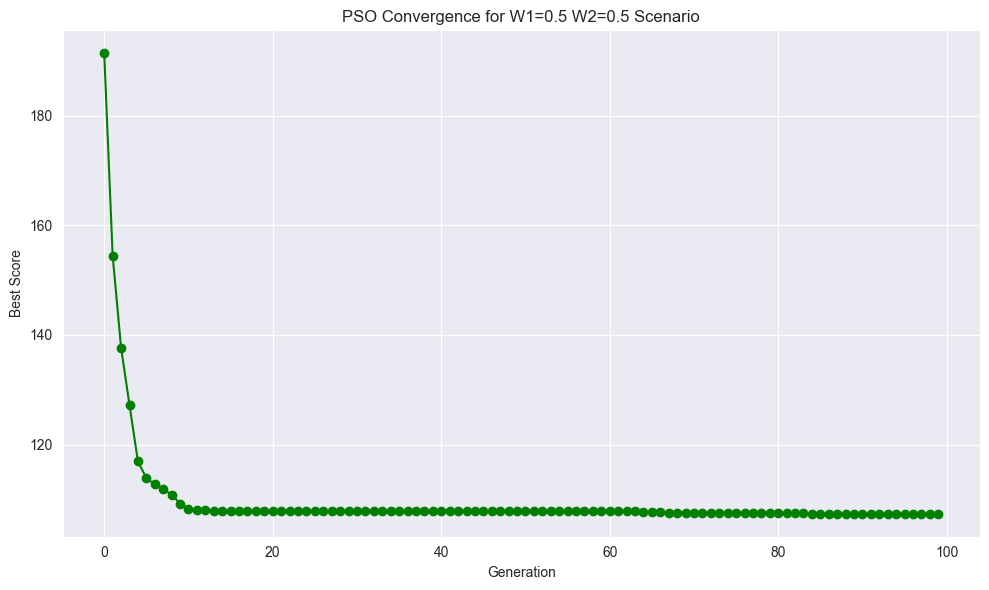


--- Results for Scenario: W1_0.5_W2_0.5 ---
Best GA Score: 107.6194
Total newly built green area (GA): 2,862,706.99 m²
Best PSO Score: 107.3824
Total newly built green area (PSO): 2,999,721.54 m²

📁 w1=0.5 w2=0.5 scenario result saved to file 'outputs/one_scenario.csv'.


In [44]:
#limitations of green spaces
TOTAL_LIMIT = 3_000_000
PER_TOWN_LIMIT = 1_000_000

POP_SIZE = 100  # GA Population size
GENS = 200  # GA Generations
MUT_PROB = 0.2
ELITISM = 0.1

PSO_POP_SIZE = 30  # PSO Population size (number of particles)
PSO_ITERATIONS = 100  # PSO Iterations (k_max)


def init_population(bounds):
    return [repair_individual(np.array([random.uniform(lb, ub) for lb, ub in bounds]), bounds) for _ in range(POP_SIZE)]


def mutate(individual, bounds):
    mutant = np.array([
        min(ub, max(lb, gene + np.random.normal(0, (ub - lb) * 0.1)))  # Mutation scaled by bound range
        for gene, (lb, ub) in zip(individual, bounds)
    ])
    return repair_individual(mutant, bounds)


def crossover(p1, p2):
    alpha = np.random.rand(len(p1))
    child = alpha * p1 + (1 - alpha) * p2
    return child


def select(population, fitnesses):
    num_elites = max(1, int(ELITISM * POP_SIZE)) if POP_SIZE > 0 and ELITISM > 0 else 0
    if not population:
        return []

    # Handle non-finite fitness values before sorting
    finite_fitness_indices = [i for i, f in enumerate(fitnesses) if np.isfinite(f)]
    if not finite_fitness_indices:  # All fitnesses are non-finite
        # Fallback: if no finite fitnesses, select randomly or return empty
        # This case should ideally be prevented by robust objective/repair functions
        return [random.choice(population) for _ in range(num_elites)] if population and num_elites > 0 else []

    # Sort based on finite fitnesses, placing non-finite ones effectively at the end (worst)
    # Create a list of (fitness, original_index) tuples for sorting
    sortable_fitnesses = []
    for i, f in enumerate(fitnesses):
        if np.isfinite(f):
            sortable_fitnesses.append((f, i))
        else:
            sortable_fitnesses.append((float('inf'), i))  # Treat non-finite as worst

    sorted_indices = [i for f, i in sorted(sortable_fitnesses, key=lambda x: x[0])]
    return [population[i] for i in sorted_indices[:num_elites]]


def repair_individual(x, bounds):
    x = np.array([np.clip(val, bounds[i][0], bounds[i][1]) for i, val in enumerate(x)])
    total = np.sum(x)
    if total > TOTAL_LIMIT:
        # Avoid division by zero if total is zero (though unlikely if TOTAL_LIMIT > 0)
        if total > 1e-9:
            x = x * (TOTAL_LIMIT / total)
        else:  # If total is near zero and exceeds TOTAL_LIMIT (impossible if TOTAL_LIMIT > 0)
            x = np.zeros_like(x)  # Or handle as an error/special case

    x = np.array([np.clip(val, bounds[i][0], bounds[i][1]) for i, val in enumerate(x)])
    if np.sum(x) > TOTAL_LIMIT:
        current_sum = np.sum(x)
        if current_sum > 1e-9:  # Avoid division by zero
            x = x * (TOTAL_LIMIT / current_sum)
        else:
            x = np.zeros_like(x)
    return x


def run_ga(bounds, objective_func_ga):  # Renamed to avoid conflict
    population = init_population(bounds)
    history = []

    for gen in range(GENS):
        fitnesses = [objective_func_ga(ind) for ind in population]

        if not fitnesses:
            best_fitness_this_gen = float('inf')
        else:
            valid_fitnesses = [f for f in fitnesses if np.isfinite(f)]
            if not valid_fitnesses:
                best_fitness_this_gen = float('inf')
            else:
                best_fitness_this_gen = min(valid_fitnesses)

        history.append(best_fitness_this_gen)
        selected_elites = select(population, fitnesses)

        if not selected_elites and POP_SIZE > 0:
            if population and any(np.isfinite(f) for f in fitnesses):  # Check if any finite fitness exists
                # Get indices of finite fitnesses
                finite_indices = [i for i, f_val in enumerate(fitnesses) if np.isfinite(f_val)]
                # Get the index of the minimum finite fitness
                min_finite_idx = finite_indices[np.argmin([fitnesses[i] for i in finite_indices])]
                selected_elites = [population[min_finite_idx]]
            else:
                selected_elites = [init_population(bounds)[0] for _ in range(max(1, int(ELITISM * POP_SIZE)))]

        new_pop = list(selected_elites)

        while len(new_pop) < POP_SIZE:
            if len(selected_elites) >= 2:
                parents = random.sample(selected_elites, 2)
            elif selected_elites:
                parents = [selected_elites[0], random.choice(population)]
            else:
                parents = random.sample(population, 2) if len(population) >= 2 else [init_population(bounds)[0]] * 2

            child1 = crossover(parents[0], parents[1])

            if random.random() < MUT_PROB:
                child1 = mutate(child1, bounds)

            child1 = repair_individual(child1, bounds)
            new_pop.append(child1)
        population = new_pop

    final_fitnesses = [objective_func_ga(ind) for ind in population]

    best_idx = -1
    current_best_fitness = float('inf')
    for i, f in enumerate(final_fitnesses):
        if np.isfinite(f) and f < current_best_fitness:
            current_best_fitness = f
            best_idx = i

    if best_idx != -1:
        best_individual = population[best_idx]
    else:
        print("Warning: No valid best individual found by GA. Returning first valid or re-initialized individual.")
        # Try to find any individual with finite fitness
        valid_indices = [i for i, f_val in enumerate(final_fitnesses) if np.isfinite(f_val)]
        if valid_indices:
            best_individual = population[valid_indices[0]]  # Pick the first one found
        else:  # Absolute fallback
            best_individual = init_population(bounds)[0]

    best_score_val = objective_func_ga(best_individual)

    return best_individual, best_score_val, history


class Particle:
    def __init__(self, x, v, bounds, repair_func, objective_func_pso):  # Renamed
        self.x = np.array(x)
        self.v = np.array(v)
        self.bounds = bounds
        self.repair_func = repair_func
        self.objective_func_pso = objective_func_pso  # Renamed

        self.x = self.repair_func(self.x, self.bounds)
        self.pbest_x = self.x.copy()
        self.pbest_score = self.objective_func_pso(self.pbest_x)  # Use renamed

    def update_velocity(self, gbest_x, w, c1, c2, n_dim):
        r1, r2 = np.random.rand(n_dim), np.random.rand(n_dim)
        self.v = w * self.v + \
                 c1 * r1 * (self.pbest_x - self.x) + \
                 c2 * r2 * (gbest_x - self.x)
        max_vel_ratio = 0.2
        for i in range(n_dim):
            max_v = (self.bounds[i][1] - self.bounds[i][0]) * max_vel_ratio
            self.v[i] = np.clip(self.v[i], -max_v, max_v)

    def update_position(self):
        self.x += self.v
        self.x = self.repair_func(self.x, self.bounds)
        current_score = self.objective_func_pso(self.x)  # Use renamed
        if np.isfinite(current_score) and current_score < self.pbest_score:
            self.pbest_x = self.x.copy()
            self.pbest_score = current_score


def particle_swarm_optimization(objective_func_pso, population_particles, k_max, w=0.7, c1=1.5, c2=1.5):  # Renamed
    if not population_particles:
        return None, float('inf'), []

    gbest_x = None
    gbest_score = float('inf')

    # Initialize global best from particles, ensuring finite scores are preferred
    for particle in population_particles:
        if np.isfinite(particle.pbest_score) and particle.pbest_score < gbest_score:
            gbest_score = particle.pbest_score
            gbest_x = particle.pbest_x.copy()

    # If no particle had a finite pbest_score initially, gbest_x might still be None
    if gbest_x is None and population_particles:
        # Fallback: pick the first particle's pbest if available, or initialize
        if population_particles[0].pbest_x is not None:
            gbest_x = population_particles[0].pbest_x.copy()
            gbest_score = population_particles[0].pbest_score  # Might be inf
        else:  # Should not happen if particle init is correct
            return None, float('inf'), []

    if gbest_x is None:  # Still no gbest_x means population_particles was empty or problematic
        return None, float('inf'), []

    n_dim = len(gbest_x)
    history = []

    for k in range(k_max):
        for particle in population_particles:
            particle.update_velocity(gbest_x, w, c1, c2, n_dim)
            particle.update_position()  # This updates particle.pbest_score

            if np.isfinite(particle.pbest_score) and particle.pbest_score < gbest_score:
                gbest_score = particle.pbest_score
                gbest_x = particle.pbest_x.copy()
        history.append(gbest_score)

    return gbest_x, gbest_score, history


def create_pso_population(num_particles, bounds, repair_func, objective_func_pso, seed):  # Renamed
    # np.random.seed(seed) # Seeding here might make all initial particles too similar if objective_func is deterministic
    # random.seed(seed) # Better to seed once globally if needed
    population = []
    n_dim = len(bounds)
    for _ in range(num_particles):
        x = np.array([random.uniform(lb, ub) for lb, ub in bounds])
        v = np.array([random.uniform(-(bounds[i][1] - bounds[i][0]) * 0.1, (bounds[i][1] - bounds[i][0]) * 0.1) for i in
                      range(n_dim)])

        # Ensure objective_func_pso is callable for particle initialization
        particle = Particle(x, v, bounds, repair_func, objective_func_pso)
        population.append(particle)
    return population


def main():
    # Define W1 and W2 scenarios
    weight_scenarios = [
        {"W1": 0.5, "W2": 0.5, "label": "W1_0.5_W2_0.5"},
    ]

    df_base = pd.read_csv("data_processed/birlesik_ilce_verisi.csv")
    df_results = df_base.copy()

    # Transportation score (calculated once)
    df_base["Ti_raw"] = df_base["Minibus_Durak_Sayisi"] + df_base["Taksi_Durak_Sayisi"] + 2 * df_base[
        "Rayli_Istasyon_Sayisi"]

    # Normalizations (independent of W1, W2 - calculated once)
    GA_real = df_base["alan_metrekare"].values.astype(float)
    GA_min, GA_max = GA_real.min(), GA_real.max()
    GA_norm = (GA_real - GA_min) / (GA_max - GA_min + 1e-9)

    P_real = df_base["Nufus"].values.astype(float)
    P_min, P_max = P_real.min(), P_real.max()
    P_norm = (P_real - P_min) / (P_max - P_min + 1e-9)

    Ti_real = df_base["Ti_raw"].values.astype(float)
    Ti_min, Ti_max = Ti_real.min(), Ti_real.max()
    Ti_norm = (Ti_real - Ti_min) / (Ti_max - Ti_min + 1e-9)

    AQI_real = df_base["Ortalama_AQI"].values.astype(float)
    AQI_min, AQI_max = AQI_real.min(), AQI_real.max()
    AQI_norm = (AQI_real - AQI_min) / (AQI_max - AQI_min + 1e-9)

    # Bounds (calculated once)
    lower_bounds = np.zeros(len(GA_real))
    upper_bounds = np.minimum(GA_real / 2, PER_TOWN_LIMIT)
    for i in range(len(upper_bounds)):
        if lower_bounds[i] > upper_bounds[i]:
            upper_bounds[i] = lower_bounds[i]
    bounds = list(zip(lower_bounds, upper_bounds))

    # Dictionary to hold parameters for the objective function that change per scenario
    objective_params = {'S_norm_current': None}

    # Define objective function (it will use S_norm_current from objective_params)
    def objective(x_new_green_area_real):
        x_new_green_area_real = np.array(x_new_green_area_real)
        x_norm = x_new_green_area_real / (GA_max + 1e-9)
        total_norm_green_area = GA_norm + x_norm

        current_S_norm = objective_params['S_norm_current']

        performance_term = (current_S_norm * P_norm) / (total_norm_green_area + 1e-6)
        base = np.sum(performance_term)

        current_total_green_area_real = GA_real + x_new_green_area_real
        green_per_person_real = current_total_green_area_real / (P_real + 1e-9)

        initial_green_per_person_real = GA_real / (P_real + 1e-9)
        if np.max(initial_green_per_person_real) > 1e-9:
            norm_initial_gpp = initial_green_per_person_real / np.max(initial_green_per_person_real)
        else:
            norm_initial_gpp = np.zeros_like(initial_green_per_person_real)

        # Penalty for districts with less than 1 m² per person
        gpp_deficit = np.maximum(1.0 - green_per_person_real, 0)
        penalty_min_gpp = np.sum(gpp_deficit)

        fairness_penalty = np.sum(x_new_green_area_real * norm_initial_gpp)

        # coefficients
        penalty_coefficient = 0.000005
        min_gpp_penalty_coeff = 0.0001

        return base + penalty_coefficient * fairness_penalty + min_gpp_penalty_coeff * penalty_min_gpp

    #for best scores
    score_rows = []

    # Loop through scenarios
    for scenario in weight_scenarios:
        W1_scen = scenario["W1"]
        W2_scen = scenario["W2"]
        label = scenario["label"]

        print(f"\n--- Running Scenario: {label} (W1={W1_scen}, W2={W2_scen}) ---")

        # Calculate S_norm for the current scenario and update objective_params
        objective_params['S_norm_current'] = W1_scen * AQI_norm + W2_scen * Ti_norm

        print("🧬 Running Genetic Algorithm...")
        # Pass the 'objective' function which now uses the updated 'S_norm_current'
        best_solution_ga, best_score_ga, history_ga = run_ga(bounds, objective)

        #shows and saves the convergence behaviour of ga algorithm
        plt.figure(figsize=(10, 6))
        plt.plot(history_ga, marker='o', linestyle='-', color='green')
        plt.title(f"GA Convergence for W1=0.5 W2=0.5 Scenario")
        plt.xlabel("Generation")
        plt.ylabel("Best Score")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig("outputs/ga_convergence.png")
        plt.show()

        print("\n⚙️ Running Particle Swarm Optimization...")
        # Seed for PSO population creation to ensure some consistency if desired for PSO part
        # Note: Seeding inside create_pso_population might be better if full reproducibility per call is needed
        # For now, using a fixed seed for each scenario's PSO population creation
        pso_particles = create_pso_population(PSO_POP_SIZE, bounds, repair_individual, objective, seed=42)
        best_solution_pso, best_score_pso, history_pso = particle_swarm_optimization(
            objective_func_pso=objective,  # PSO also uses the same objective
            population_particles=pso_particles,
            k_max=PSO_ITERATIONS
        )

        #shows and saves the convergence behaviour of pso algorithm
        plt.figure(figsize=(10, 6))
        plt.plot(history_pso, marker='o', linestyle='-', color='green')
        plt.title(f"PSO Convergence for W1=0.5 W2=0.5 Scenario")
        plt.xlabel("Generation")
        plt.ylabel("Best Score")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig("outputs/pso_convergence.png")
        plt.show()


        # Store results with scenario-specific column names
        ga_col_yeni = f"Yeni_Yapilacak_Yesil_Alan_GA_{label}"
        ga_col_toplam = f"Toplam_Yesil_Alan_GA_{label}"
        pso_col_yeni = f"Yeni_Yapilacak_Yesil_Alan_PSO_{label}"
        pso_col_toplam = f"Toplam_Yesil_Alan_PSO_{label}"

        df_results[ga_col_yeni] = best_solution_ga
        df_results[ga_col_toplam] = df_results["alan_metrekare"] + best_solution_ga

        if best_solution_pso is not None:
            df_results[pso_col_yeni] = best_solution_pso
            df_results[pso_col_toplam] = df_results["alan_metrekare"] + best_solution_pso
        else:
            df_results[pso_col_yeni] = 0  # Or np.nan
            df_results[pso_col_toplam] = df_results["alan_metrekare"]

        print(f"\n--- Results for Scenario: {label} ---")
        print(f"Best GA Score: {best_score_ga:.4f}")
        print(f"Total newly built green area (GA): {np.sum(best_solution_ga):,.2f} m²")

        if best_solution_pso is not None:
            print(f"Best PSO Score: {best_score_pso:.4f}")
            print(f"Total newly built green area (PSO): {np.sum(best_solution_pso):,.2f} m²")
        else:
            print("⚠️ PSO did not return a valid solution for this scenario.")

        # save the scores
        score_rows.append({
            "Scenario_Label": label,
            "W1": W1_scen,
            "W2": W2_scen,
            "Best_Score_GA": best_score_ga,
            "Best_Score_PSO": best_score_pso if best_solution_pso is not None else None
        })

    # Save the consolidated DataFrame
    output_filename = "outputs/one_scenario.csv"
    df_results.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"\n📁 w1=0.5 w2=0.5 scenario result saved to file '{output_filename}'.")

if __name__ == "__main__":
    # Create a dummy CSV for testing if it doesn't exist
    dummy_csv_path = "data_processed/birlesik_ilce_verisi.csv"
    try:
        pd.read_csv(dummy_csv_path)
    except FileNotFoundError:
        print(f"Dummy '{dummy_csv_path}' not found. Creating one for testing.")
        if not os.path.exists("result"):
            os.makedirs("result")
        dummy_data = {
            "ILCE": [f"Ilce_{i}" for i in range(10)],
            "Minibus_Durak_Sayisi": np.random.randint(5, 50, 10),
            "Taksi_Durak_Sayisi": np.random.randint(2, 20, 10),
            "Rayli_Istasyon_Sayisi": np.random.randint(0, 5, 10),
            "alan_metrekare": np.random.randint(100000, 2000000, 10).astype(float),
            "Nufus": np.random.randint(50000, 500000, 10).astype(float),
            "Ortalama_AQI": np.random.uniform(20, 80, 10)
        }
        dummy_df = pd.DataFrame(dummy_data)
        dummy_df.to_csv(dummy_csv_path, index=False)
        print("Dummy CSV created.")

    random.seed(42)
    np.random.seed(42)
    main()

RESULTS

Best score comparisons of genetic algorithm and particular swarm optimization algorithms (in w1=0.5 w2=0.5 scenario)

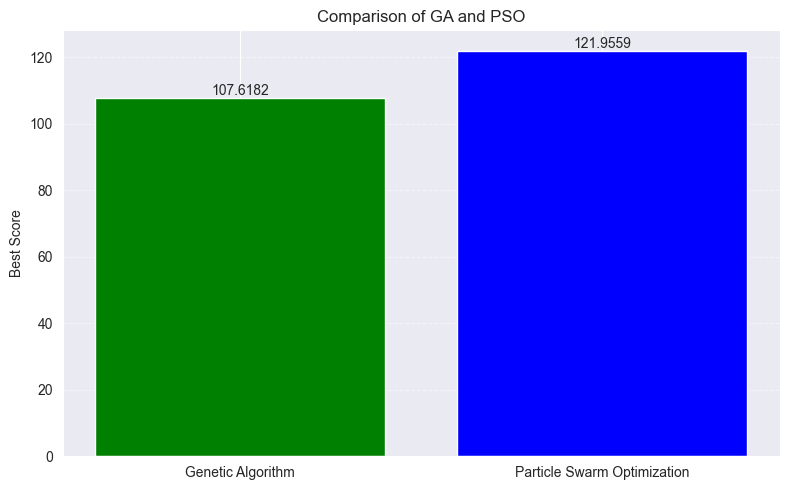

In [45]:
df_scores = pd.read_csv("outputs/optimization_best_scores.csv")

target = df_scores[(df_scores["W1"] == 0.5) & (df_scores["W2"] == 0.5)].iloc[0]

ga_score = target["Best_Score_GA"]
pso_score = target["Best_Score_PSO"]

labels = ["Genetic Algorithm", "Particle Swarm Optimization"]
scores = [ga_score, pso_score]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=["green", "blue"])
plt.ylabel("Best Score")
plt.title("Comparison of GA and PSO")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha="center", va="bottom")

plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Below, we observe the amount of green space per capita and how much new green space the ga and pso algorithms have given to that district. The algorithms clearly prioritize regions with low green space per capita.

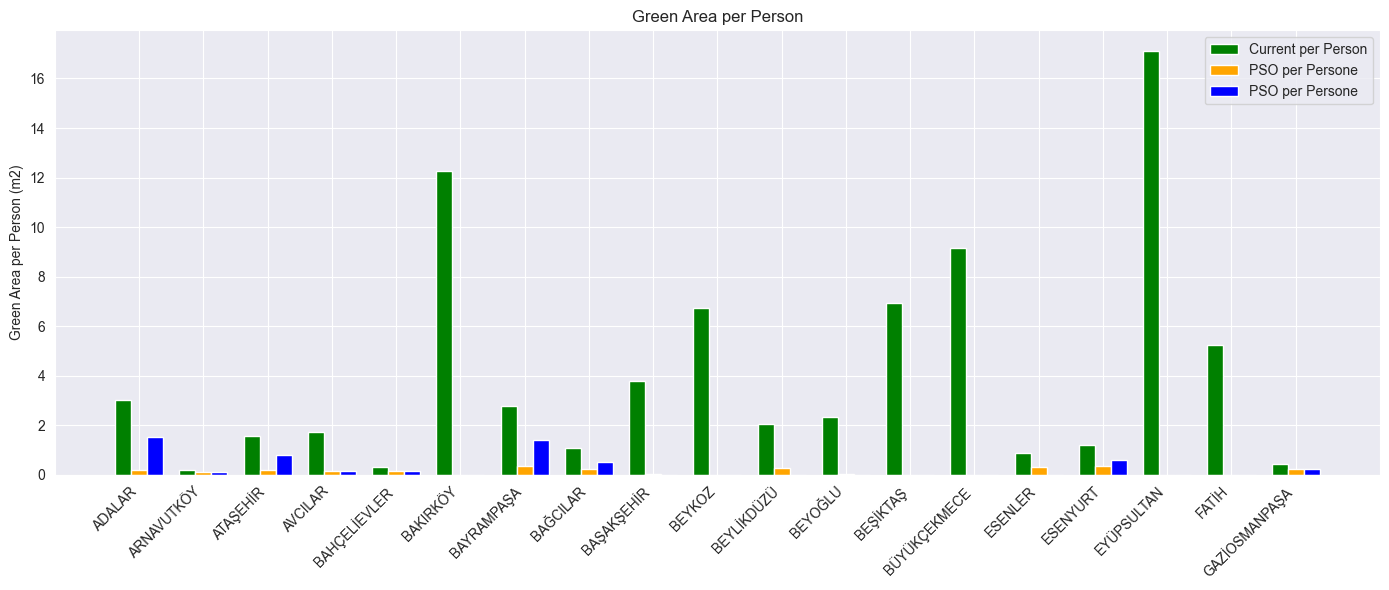

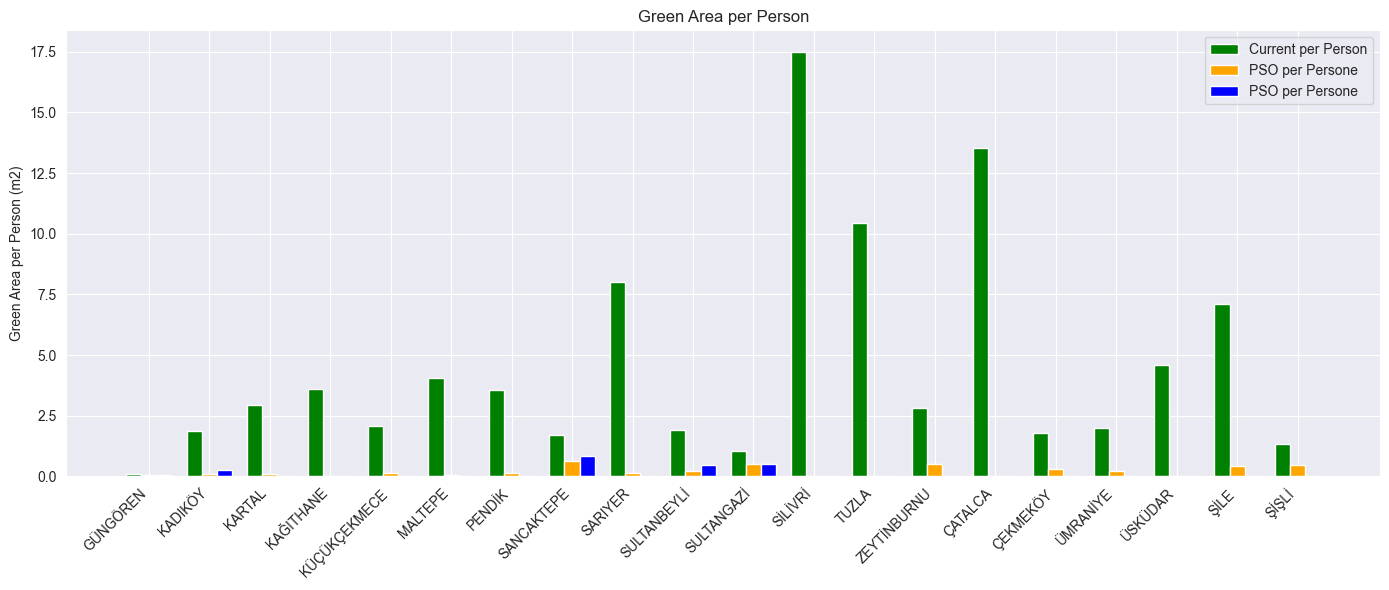

In [46]:

df = pd.read_csv("outputs/one_scenario.csv")

df["kisi_basi_mevcut"] = df["alan_metrekare"] / df["Nufus"]
df["kisi_basi_ga"] = df["Yeni_Yapilacak_Yesil_Alan_GA_W1_0.5_W2_0.5"] / df["Nufus"]
df["kisi_basi_pso"] = df["Yeni_Yapilacak_Yesil_Alan_PSO_W1_0.5_W2_0.5"] / df["Nufus"]

ilceler = df["ILCE"]
kisi_basi_mevcut = df["kisi_basi_mevcut"]
kisi_basi_ga = df["kisi_basi_ga"]
kisi_basi_pso = df["kisi_basi_pso"]

# divide
orta_index = len(df) // 2

ilceler_1 = ilceler[:orta_index]
mevcut_1 = kisi_basi_mevcut[:orta_index]
ga_1 = kisi_basi_ga[:orta_index]
pso_1 = kisi_basi_pso[:orta_index]


ilceler_2 = ilceler[orta_index:]
mevcut_2 = kisi_basi_mevcut[orta_index:]
ga_2 = kisi_basi_ga[orta_index:]
pso_2 = kisi_basi_pso[orta_index:]


def plot_grouped_bar(ilceler, mevcut, ga, pso, title):
    x = np.arange(len(ilceler))
    width = 0.25

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(x - width, mevcut, width, label="Current per Person", color="green")
    ax.bar(x, ga, width, label="PSO per Persone", color="orange")
    ax.bar(x + width, pso, width, label="PSO per Persone", color="blue")

    ax.set_ylabel("Green Area per Person (m2)")
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(ilceler, rotation=45, ha="right")
    ax.legend()
    plt.tight_layout()
    plt.show()

# first graph
plot_grouped_bar(ilceler_1, mevcut_1, ga_1, pso_1, "Green Area per Person")

# second graph
plot_grouped_bar(ilceler_2, mevcut_2, ga_2, pso_2, "Green Area per Person")


Here we can observe the converge behavior of the ga and pso algorithms. While ga converges after about 50 generations, pso does so in only 10 steps.

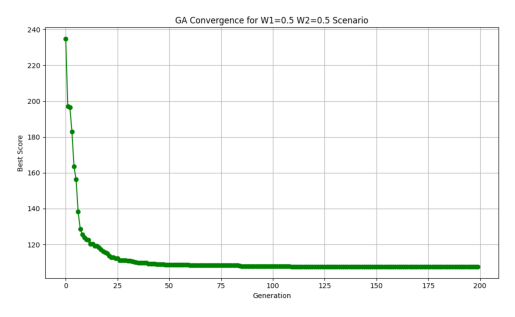

In [5]:
import matplotlib.image as mpimg
img = mpimg.imread('outputs/ga_convergence.png')
plt.imshow(img)
plt.axis('off')
plt.show()

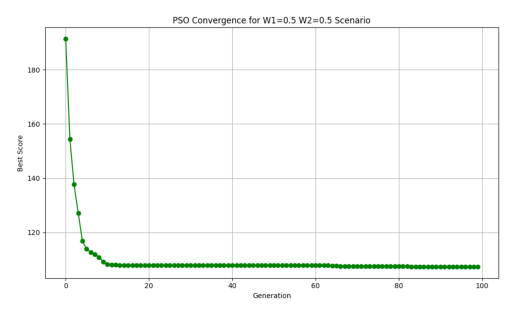

In [6]:
img = mpimg.imread('outputs/pso_convergence.png')
plt.imshow(img)
plt.axis('off')
plt.show()

/var/folders/fr/m_3mjrmn62d0n8qqzk2yw_mm0000gn/T/ipykernel_24175/1492768055.py:9: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  top_ilceler = pd.unique(top_ga["ILCE"].tolist() + top_pso["ILCE"].tolist())


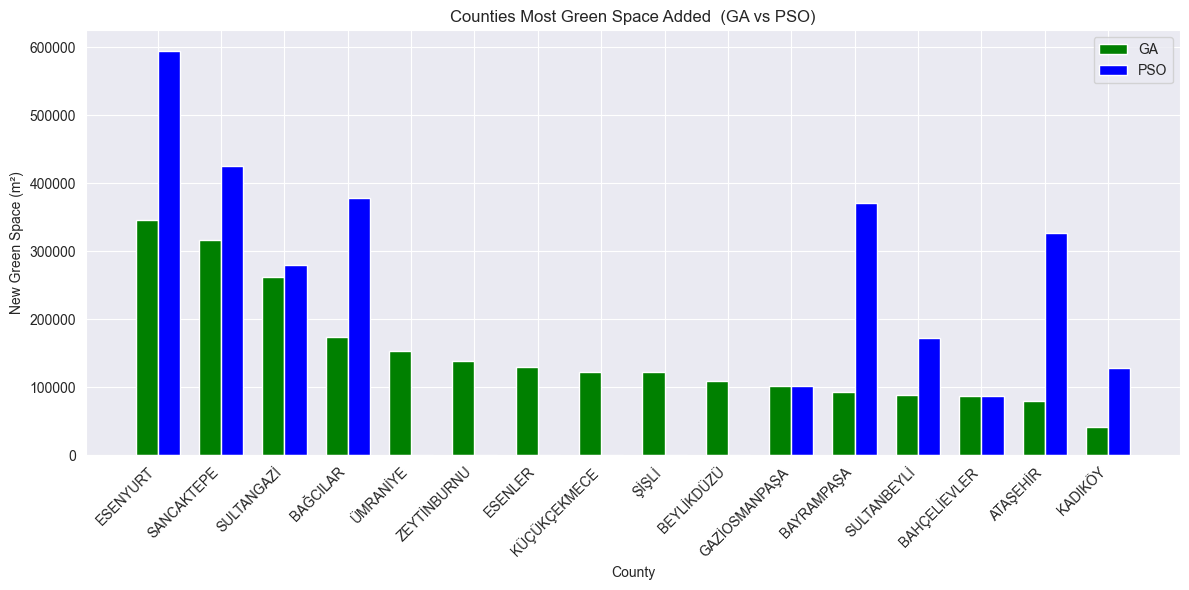

In [47]:
ga_col = "Yeni_Yapilacak_Yesil_Alan_GA_W1_0.5_W2_0.5"
pso_col = "Yeni_Yapilacak_Yesil_Alan_PSO_W1_0.5_W2_0.5"


top_ga = df.nlargest(10, ga_col)[["ILCE", ga_col]]
top_pso = df.nlargest(10, pso_col)[["ILCE", pso_col]]


top_ilceler = pd.unique(top_ga["ILCE"].tolist() + top_pso["ILCE"].tolist())


compare_df = df[df["ILCE"].isin(top_ilceler)][["ILCE", ga_col, pso_col]].set_index("ILCE")
compare_df = compare_df.sort_values(by=ga_col, ascending=False)

plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(compare_df))

plt.bar(x, compare_df[ga_col], width=bar_width, label="GA", color="green")
plt.bar([i + bar_width for i in x], compare_df[pso_col], width=bar_width, label="PSO", color="blue")

plt.xlabel("County")
plt.ylabel("New Green Space (m²)")
plt.title("Counties Most Green Space Added  (GA vs PSO)")
plt.xticks([i + bar_width/2 for i in x], compare_df.index, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In addition to these, we created a dynamic map that can be manipulated with w1 and w2 values. Thus, we can observe how these values ​​cause changes in the results of GA and PSO algorithms. Since the map codes do not work on this file, we put it in the map folder. You can examine the results from the link that comes by running the main.py file.

There is a picture of map:

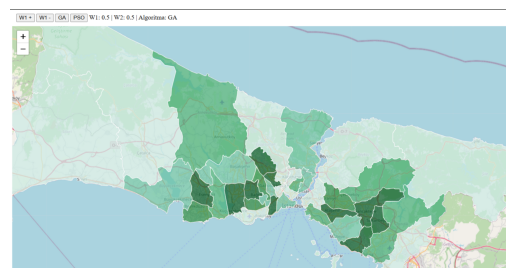

In [48]:
import matplotlib.image as mpimg
img = mpimg.imread('map.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Veri seti (100 örnek, 2 özellik)
np.random.seed(42)
feature_1 = np.random.normal(loc=50, scale=10, size=100)
feature_2 = np.random.normal(loc=500, scale=100, size=100)
X = np.column_stack((feature_1, feature_2))

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

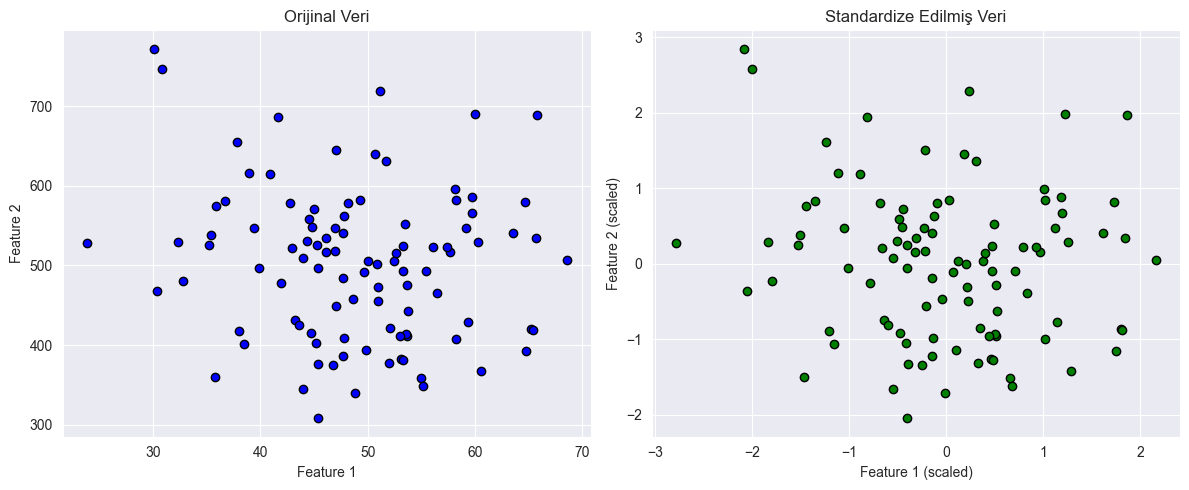

In [4]:
plt.figure(figsize=(12, 5))

# Orijinal veri
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k')
plt.title("Orijinal Veri")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# Standardize edilmiş veri
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='green', edgecolor='k')
plt.title("Standardize Edilmiş Veri")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [1]:
import numpy as np

# Orijinal veri: her satır bir gen, her sütun bir fare (özellik = fare)
X = np.array([
    [10, 11, 8, 3, 2, 1],   # Gene 1
    [6, 4, 5, 3, 2.8, 1]    # Gene 2
])

# 1. Adım: Veriyi örnekler (fareler) satırlarda olacak şekilde transpoze et
X = X.T  # Şimdi shape (6, 2) oldu — 6 gözlem, 2 özellik

# 2. Adım: Ortalama ile merkezleme (mean centering)
X_meaned = X - np.mean(X, axis=0)

# 3. Adım: Kovaryans matrisini hesapla
cov_matrix = np.cov(X_meaned, rowvar=False)  # Shape (2, 2)

# 4. Adım: Eigenvalue ve eigenvector'leri bul
eigen_vals, eigen_vecs = np.linalg.eigh(cov_matrix)

# 5. Adım: En büyük eigenvalue’ya karşılık gelen eigenvector'ü seç
idx = np.argsort(eigen_vals)[::-1]      # Büyükten küçüğe sırala
top_vec = eigen_vecs[:, idx[0]]         # En büyük özvektör

# 6. Adım: Veriyi bu bileşene projekte et
X_pca = X_meaned @ top_vec              # Shape: (6,)

# Sonuç
print("1D PCA sonucu (her mouse için):")
print(X_pca)

1D PCA sonucu (her mouse için):
[-4.71999755 -4.98886062 -2.50015236  2.8812487   3.89024415  5.43751769]
